In [7]:
import keras
import h5py
import cv2
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
from keras import backend as K
from tqdm import tqdm
from keras_tqdm import TQDMNotebookCallback
from tqdm import tqdm_notebook
import os

IMG_SIZE = 256
BATCH_SIZE = 64
NB_EPOCHS = 10

MODEL_NAME = 'xrayNet-keras-v2.1' #gve the model a name


In [2]:
def arr_to_bw(arr):
    nu = []
    for im in arr:
        nu.append(cv2.resize(cv2.cvtColor(im, cv2.COLOR_RGB2GRAY),(IMG_SIZE,IMG_SIZE)))
    return np.array(nu).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [3]:
from keras import callbacks

reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [TQDMNotebookCallback()] #,eary_stopping, reduce_learning]

In [16]:
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [ ]:
model.fit(
        X_train,
        Y_train,
        epochs=2,
        validation_split=0.1,
        verbose = 2,
        callbacks=callbacks
        )

In [19]:
os.chdir('C:/Science_Research/')
histories = []
for bat in tqdm_notebook(range(10)):
    print(f"---------STARTING BATCH #{bat+1}/{NB_EPOCHS}------")
    X_train = arr_to_bw(np.load(f'image_batches/X_train_{bat}.npy'))
    Y_train = np.load(f'image_batches/Y_train_{bat}.npy').reshape(-1,1)
    
    
    print("data loaded.\nStarting Training...")
    history = model.fit(
        X_train,
        Y_train,
        batch_size=16,
        epochs=2,
        validation_split=0.1,
        verbose = 2,
        callbacks=callbacks
        )
    histories.append(history)

---------STARTING BATCH #1/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 132s - loss: 0.6669 - acc: 0.6214 - val_loss: 0.6407 - val_acc: 0.6560


Epoch 2/2
 - 132s - loss: 0.6445 - acc: 0.6394 - val_loss: 0.6382 - val_acc: 0.6580
---------STARTING BATCH #2/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 130s - loss: 0.6605 - acc: 0.6262 - val_loss: 0.6585 - val_acc: 0.6220


Epoch 2/2
 - 130s - loss: 0.6384 - acc: 0.6410 - val_loss: 0.6422 - val_acc: 0.6190
---------STARTING BATCH #3/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 126s - loss: 0.6515 - acc: 0.6364 - val_loss: 0.6503 - val_acc: 0.6380


Epoch 2/2
 - 130s - loss: 0.6388 - acc: 0.6480 - val_loss: 0.6448 - val_acc: 0.6390
---------STARTING BATCH #4/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 130s - loss: 0.6387 - acc: 0.6453 - val_loss: 0.6540 - val_acc: 0.6270


Epoch 2/2
 - 130s - loss: 0.6204 - acc: 0.6600 - val_loss: 0.6830 - val_acc: 0.5810
---------STARTING BATCH #5/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 130s - loss: 0.6446 - acc: 0.6399 - val_loss: 0.6330 - val_acc: 0.6580


Epoch 2/2
 - 130s - loss: 0.6288 - acc: 0.6494 - val_loss: 0.6361 - val_acc: 0.6610
---------STARTING BATCH #6/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 129s - loss: 0.6382 - acc: 0.6468 - val_loss: 0.6358 - val_acc: 0.6400


Epoch 2/2
 - 130s - loss: 0.6222 - acc: 0.6632 - val_loss: 0.6720 - val_acc: 0.5760
---------STARTING BATCH #7/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 130s - loss: 0.6343 - acc: 0.6542 - val_loss: 0.6340 - val_acc: 0.6470


Epoch 2/2
 - 130s - loss: 0.6200 - acc: 0.6674 - val_loss: 0.6328 - val_acc: 0.6520
---------STARTING BATCH #8/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 130s - loss: 0.6364 - acc: 0.6482 - val_loss: 0.6275 - val_acc: 0.6620


Epoch 2/2
 - 130s - loss: 0.6186 - acc: 0.6689 - val_loss: 0.6286 - val_acc: 0.6480
---------STARTING BATCH #9/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 130s - loss: 0.6405 - acc: 0.6463 - val_loss: 0.6259 - val_acc: 0.6640


Epoch 2/2
 - 130s - loss: 0.6197 - acc: 0.6652 - val_loss: 0.6206 - val_acc: 0.6640
---------STARTING BATCH #10/10------
data loaded.
Starting Training...
Train on 9000 samples, validate on 1000 samples


Epoch 1/2
 - 131s - loss: 0.6346 - acc: 0.6476 - val_loss: 0.6406 - val_acc: 0.6370


Epoch 2/2
 - 131s - loss: 0.6165 - acc: 0.6677 - val_loss: 0.6982 - val_acc: 0.5720



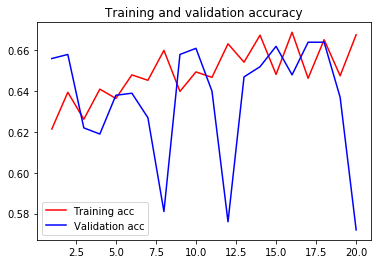

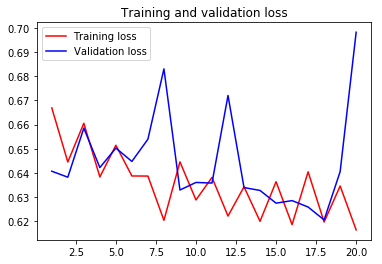

In [21]:
import matplotlib.pyplot as plt

acc = []
val_acc = []
loss = []
val_loss= []

for history in histories:
    acc += history.history['acc']
    val_acc += history.history['val_acc']
    loss += history.history['loss']
    val_loss += history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()